<a href="https://colab.research.google.com/github/elangbijak4/On_Progress_for_Build_Quantum_Virtual_Machine_Almudaya/blob/main/Quantum_Turing_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  cirq

In [ ]:
!pip install cirq --upgrade  # Upgrade Cirq to the latest version

In [4]:
import cirq
import matplotlib.pyplot as plt

In [11]:
from cirq.contrib.svg import SVGCircuit  # Import the necessary module for drawing

In [16]:
from IPython.display import SVG, display  # Import display from IPython

In [47]:
import numpy as np

Demonstrasi QTM (Quantum Turing Machine)

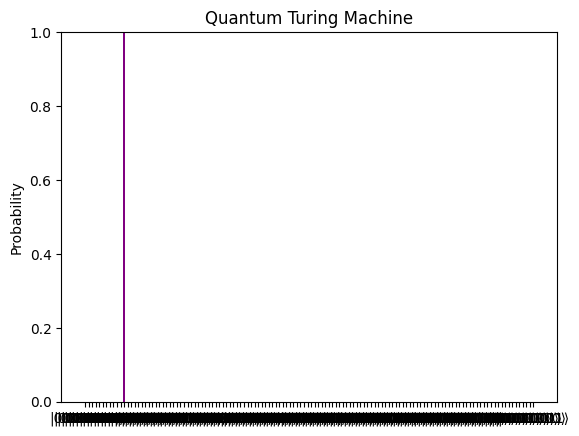

Quantum Turing Machine Circuit:
                       ┌──┐
(0, 0): ───H───M──────────────────────────

(0, 1): ───────X───@────×─────@───M───────
               │   │    │     │
(0, 2): ───────┼───┼────×─────@───×───M───
               │   │    │     │   │
(0, 3): ───────┼───┼────┼─────┼───×───M───
               │   │    │     │   │
(0, 4): ───M───┼───┼────┼─────┼───┼───────
               │   │    │     │   │
(1, 0): ───────┼───X────┼M────┼───┼───────
               │        │     │   │
(2, 0): ───H───@────────@─────X───@───M───
                       └──┘


In [119]:
# Function to simulate and plot a multi-qubit state
def simulate_and_plot_multi(circuit, qubits, title):
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    state_vector = result.final_state_vector
    probabilities = np.abs(state_vector)**2

    # Generate labels for the state vectors
    num_qubits = len(qubits)
    labels = ['|' + ''.join(str(i) for i in format(x, f'0{num_qubits}b')) + '⟩' for x in range(2**num_qubits)]
    plt.bar(labels, probabilities, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
    plt.title(title)
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.show()

# Define qubits
num_tape_cells = 5
tape = [cirq.GridQubit(0, i) for i in range(num_tape_cells)]
head = cirq.GridQubit(1, 0)
control_state = cirq.GridQubit(2, 0)

# Define QTM Circuit
circuit_qtm = cirq.Circuit()

# Initial state preparation (e.g., putting the first cell of the tape in superposition)
circuit_qtm.append(cirq.H(tape[0]))  # Put the first cell in superposition
circuit_qtm.append(cirq.H(control_state))  # Put the control state in superposition

# Apply various gates as transitions
# Example transitions
circuit_qtm.append(cirq.CNOT(control_state, tape[1]))  # CNOT based on control state
circuit_qtm.append(cirq.CNOT(tape[1], head))  # Move head based on the tape[1]

# Example of applying a SWAP if the control state is |1>
circuit_qtm.append(cirq.CSWAP(control_state, tape[1], tape[2]))  # Conditional SWAP

# Example of using Toffoli to control state transitions
circuit_qtm.append(cirq.TOFFOLI(tape[1], tape[2], control_state))

# Example of using Fredkin gate
circuit_qtm.append(cirq.FREDKIN(control_state, tape[2], tape[3]))

# Measure the final states
circuit_qtm.append([cirq.measure(q) for q in tape])
circuit_qtm.append(cirq.measure(head))
circuit_qtm.append(cirq.measure(control_state))

# Simulate and plot the QTM circuit
simulate_and_plot_multi(circuit_qtm, tape + [head, control_state], 'Quantum Turing Machine')

# Print the circuit
print("Quantum Turing Machine Circuit:")
print(circuit_qtm)

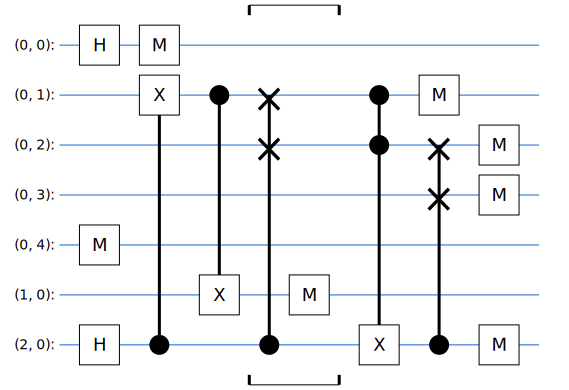

In [120]:
# Use SVGCircuit to draw the circuit
svg_circuit = cirq.contrib.svg.SVGCircuit(circuit_qtm)
svg_string = svg_circuit._repr_svg_()
display(SVG(svg_string))